In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Digit Classification

Today we will work on one of the classic problems in machine learning, digit classification. We will cover the following concepts along the way.

- multiclass classification
- feature engineering
- k-NN classifer
- Model tuning
- Model comparison

The objective of the digit classification problem is to identify what digit is written on a given image. 

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
print(digits.images.shape)
print(digits.target.shape)

(1797, 8, 8)
(1797,)


In [3]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

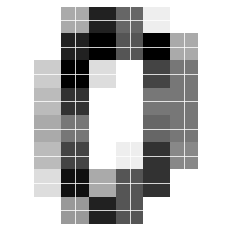

In [4]:
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

In [5]:
digits.target[0]

0

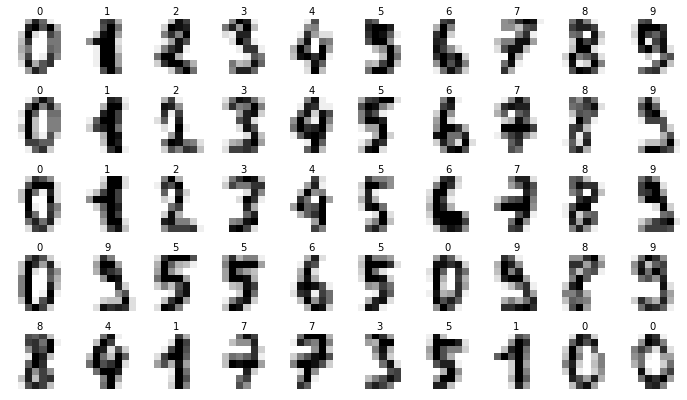

In [6]:
fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(digits.target[i]), transform=ax.transAxes)

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

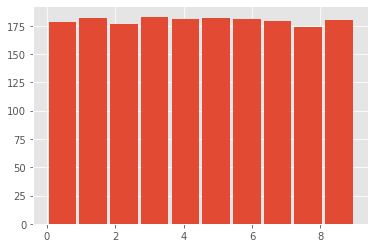

In [7]:
plt.hist(digits.target, rwidth=0.9)

# From binary classification to multi-class classification

Multi-class classication problems can be posed as multiple binary classification problem.

Two strategies.

1. One versus All (OVA) -- For $n$ classes, build $n-1$ classifiers where each one specializing in classifying 
2. One verses One (OVO) -- For $n$ classes, build $n*(n-1)/2$ classfiers, one for each pair of classes


In [8]:
# prepare data for 0 vs rest

positive = digits.data[digits.target == 0]
negative = digits.data[digits.target != 0]

combined = np.vstack([positive,negative])
labels = np.hstack([np.ones(positive.shape[0]),np.zeros(negative.shape[0])])

In [9]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=0).fit(combined, labels)

C:\Users\Sasha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
predicted = lr_clf.predict(combined)

print(f"Accuracy: {np.sum(predicted == labels)/len(predicted)}")


Accuracy: 1.0


## Exercise

<div class="alert alert-block alert-success">
    <b>Your task:</b> Create a digit classifier based on multiple logistic regression classifers doing OVO strategy.
 </div>

# Feature Engineering

How do you present an image as a feature vector? Let's start doing a very simple idea.

```
Image --> [contrast, brightness]
```

In [11]:
def get_brightness(img):
    return img.sum()

def get_contrast(img):
    return img.max() - img.min()

m = 2  # num of features
data = np.zeros((digits.data.shape[0], m))

for i in range(data.shape[0]):
    data[i][0] = get_brightness(digits.images[i])
    data[i][1] = get_contrast(digits.images[i])

In [12]:
data

array([[294.,  15.],
       [313.,  16.],
       [344.,  16.],
       ...,
       [374.,  16.],
       [344.,  16.],
       [392.,  16.]])

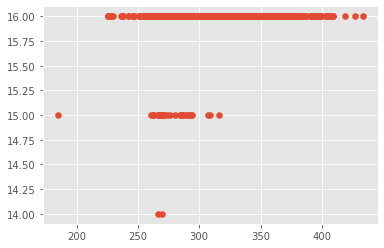

In [13]:
plt.scatter(x=data[:, 0], y=data[:, 1])

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state=0)

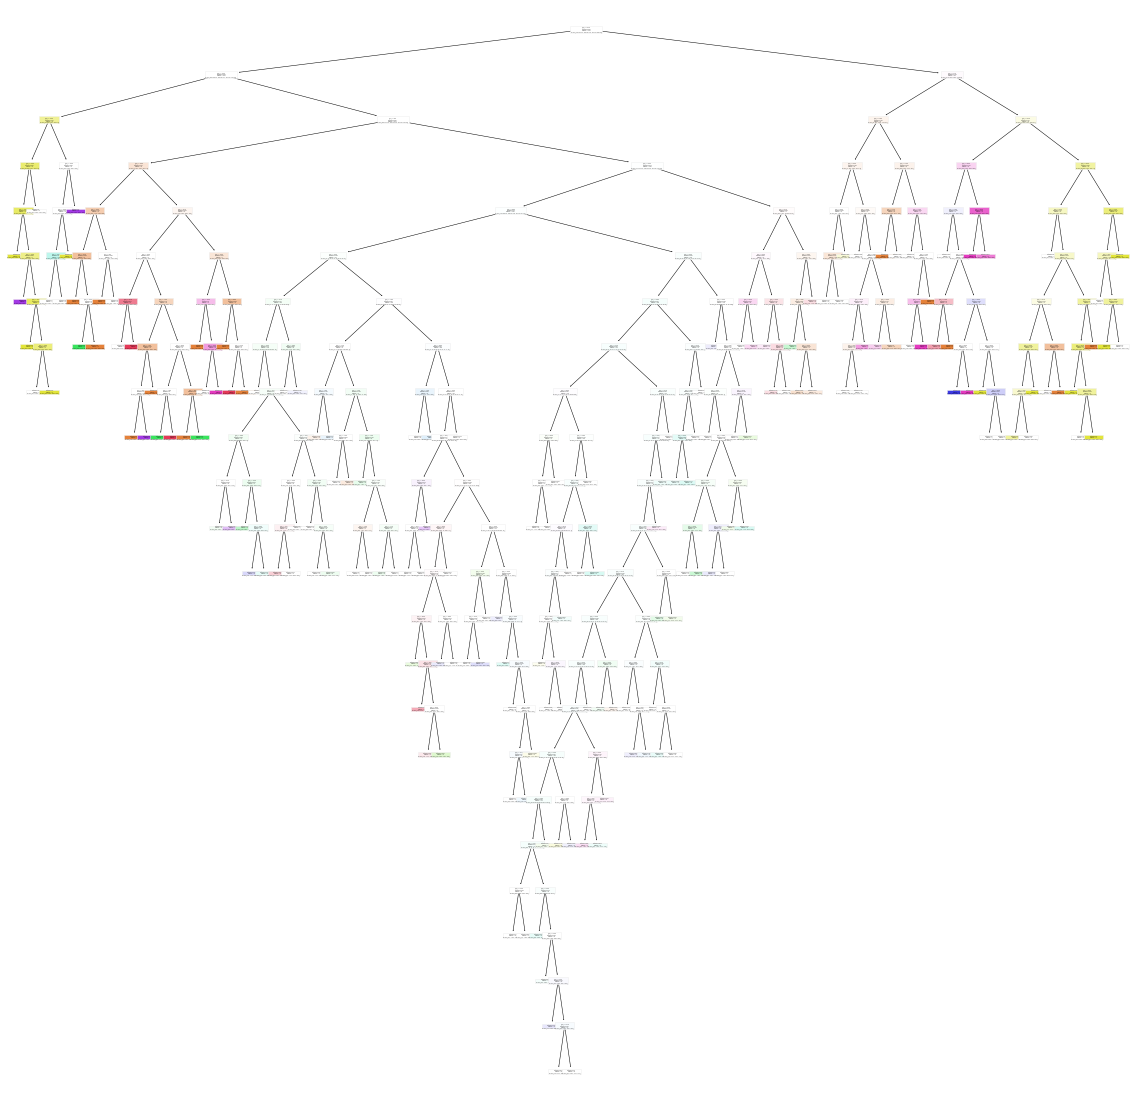

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(20,20))
dt_clf = DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(x_train,y_train)
plot_tree(dt_clf, filled=True)
plt.show()

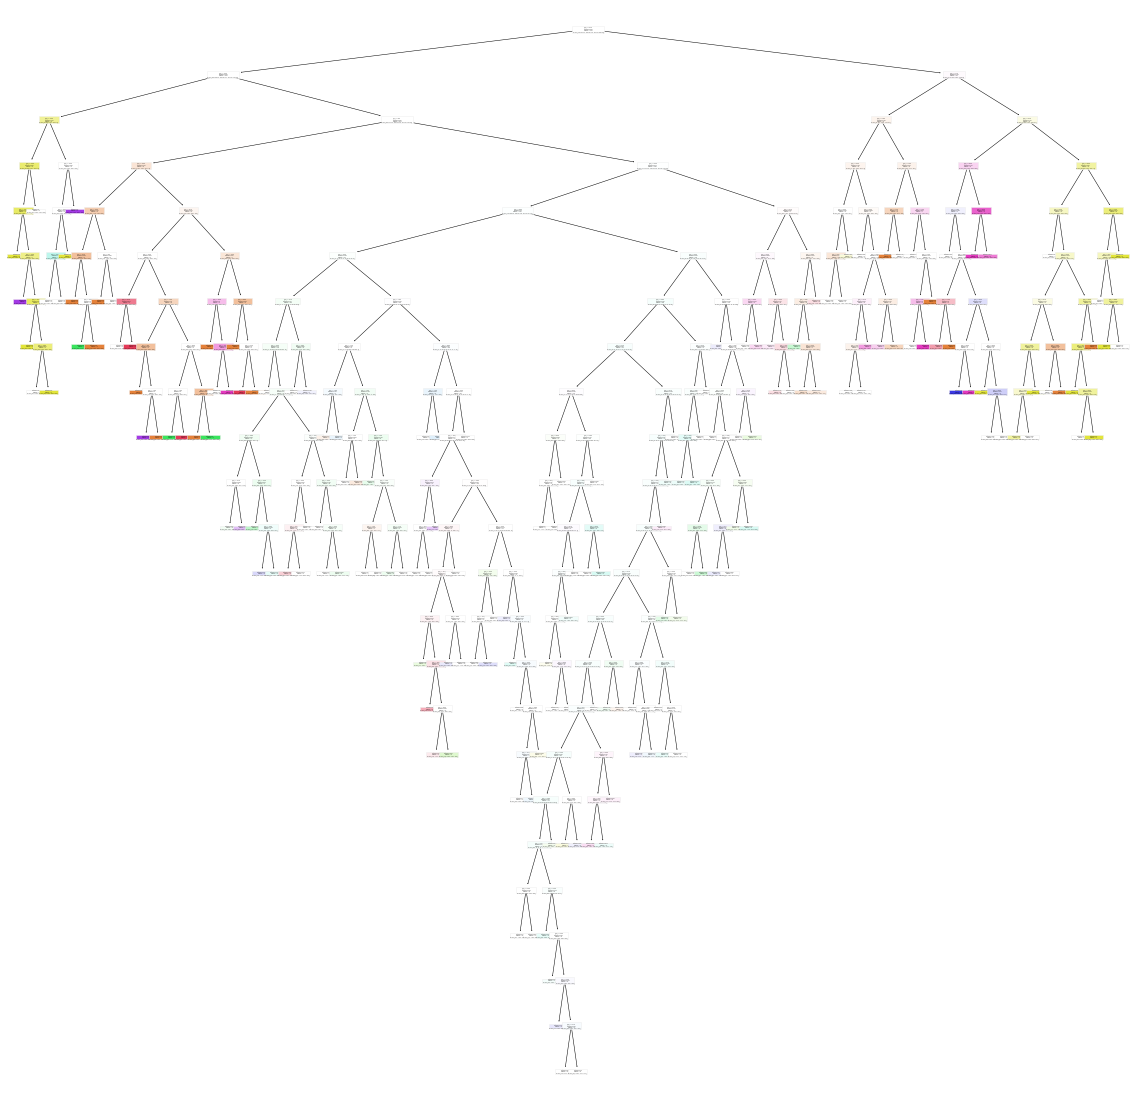

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(20,20))
dt_clf = DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(x_train,y_train)
plot_tree(dt_clf, filled=True)
plt.show()

In [17]:
from sklearn.metrics import classification_report

y_predicted = dt_clf.predict(x_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.09      0.19      0.12        27
           1       0.16      0.23      0.19        35
           2       0.15      0.11      0.13        36
           3       0.16      0.28      0.21        29
           4       0.12      0.13      0.13        30
           5       0.12      0.10      0.11        40
           6       0.14      0.14      0.14        44
           7       0.00      0.00      0.00        39
           8       0.23      0.18      0.20        39
           9       0.19      0.07      0.11        41

    accuracy                           0.14       360
   macro avg       0.13      0.14      0.13       360
weighted avg       0.14      0.14      0.13       360



In [18]:
m = 8  # num of features
data = np.zeros((digits.data.shape[0], m))

for i in range(data.shape[0]):
    data[i][0],data[i][1] = get_brightness(digits.images[i][:4,:4]), get_contrast(digits.images[i][:4,:4])
    data[i][2],data[i][3] = get_brightness(digits.images[i][4:,:4]), get_contrast(digits.images[i][4:,:4])
    data[i][4],data[i][5] = get_brightness(digits.images[i][:4,4:]), get_contrast(digits.images[i][:4,4:])
    data[i][6],data[i][7] = get_brightness(digits.images[i][4:,4:]), get_contrast(digits.images[i][4:,4:])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state=0)

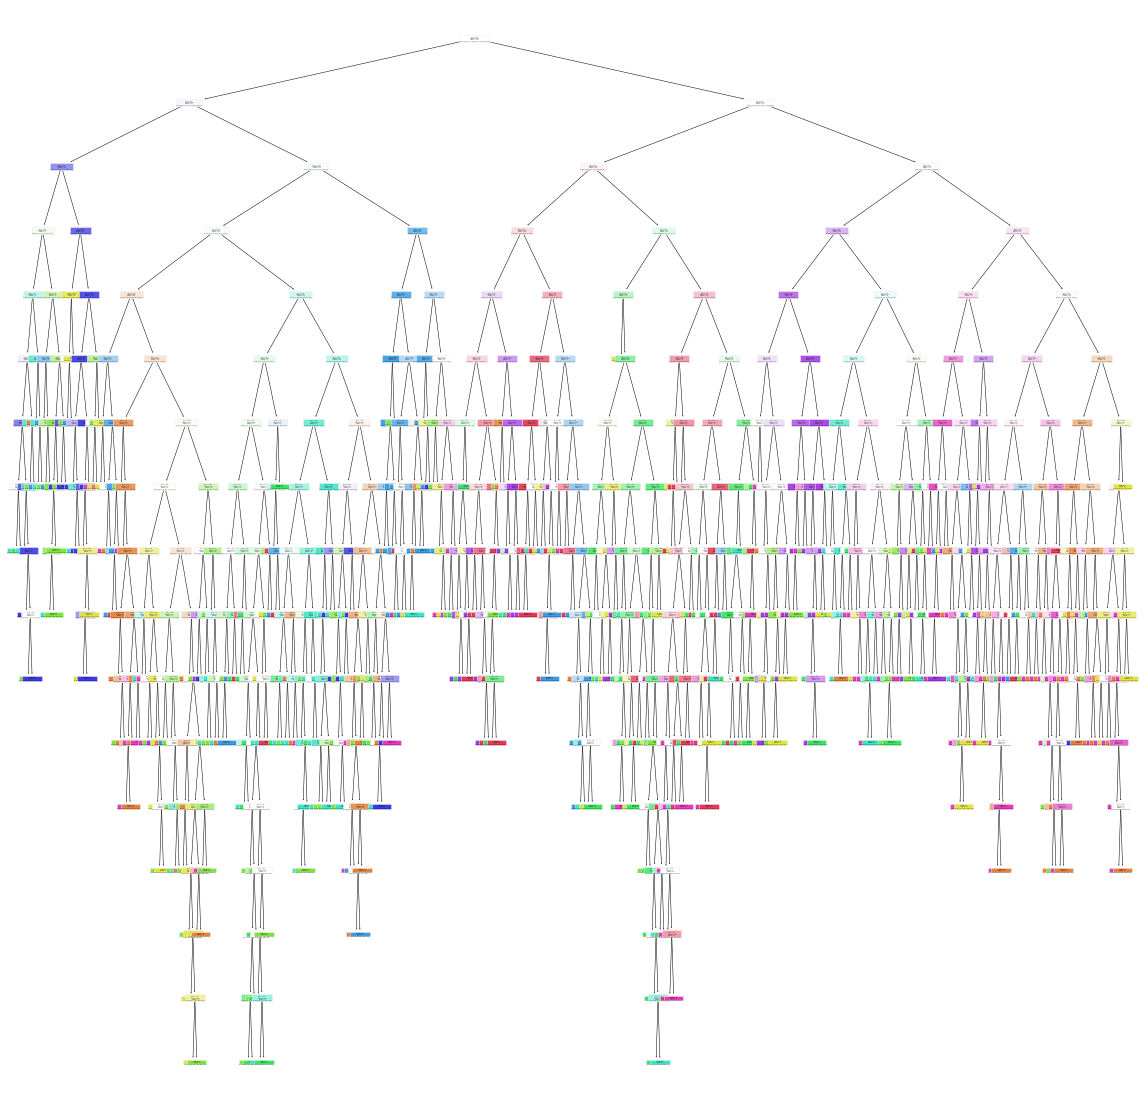

In [20]:
plt.figure(figsize=(20,20))
dt_clf = DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(x_train,y_train)
plot_tree(dt_clf, filled=True)
plt.show()

In [21]:
y_predicted = dt_clf.predict(x_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.39      0.56      0.46        27
           1       0.45      0.63      0.52        35
           2       0.25      0.25      0.25        36
           3       0.31      0.38      0.34        29
           4       0.42      0.33      0.37        30
           5       0.70      0.65      0.68        40
           6       0.90      0.86      0.88        44
           7       0.61      0.64      0.62        39
           8       0.29      0.15      0.20        39
           9       0.69      0.61      0.65        41

    accuracy                           0.52       360
   macro avg       0.50      0.51      0.50       360
weighted avg       0.52      0.52      0.52       360



In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

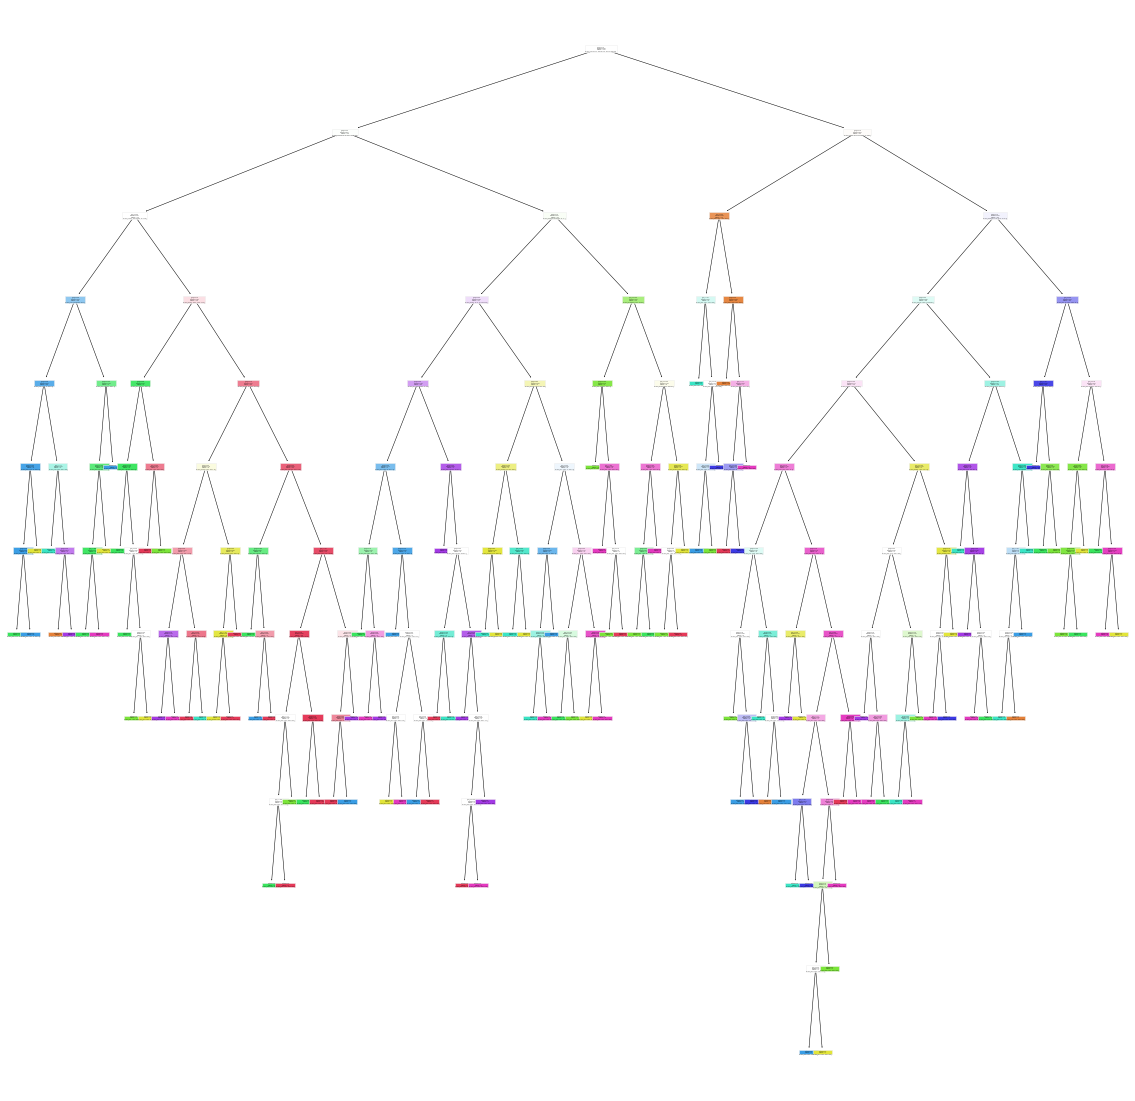

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(20,20))
dt_clf = DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(x_train,y_train)
plot_tree(dt_clf, filled=True)
plt.show()

In [24]:
from sklearn.metrics import classification_report

y_predicted = dt_clf.predict(x_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.85      0.83      0.84        35
           2       0.85      0.78      0.81        36
           3       0.67      0.90      0.76        29
           4       0.87      0.87      0.87        30
           5       0.94      0.82      0.88        40
           6       0.97      0.89      0.93        44
           7       0.88      0.92      0.90        39
           8       0.79      0.85      0.81        39
           9       0.82      0.80      0.81        41

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.86      0.85      0.85       360



Precision and recall are then defined as:[24]
https://en.wikipedia.org/wiki/Precision_and_recall#Definition_(classification_context)



\begin{aligned}
{\text{Precision}}&={\frac {tp}{tp+fp}}\\
{\text{Recall}}&={\frac {tp}{tp+fn}}\,
\end{aligned}


\begin{aligned}
F = 2 \cdot {\frac {\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}}
\end{aligned}

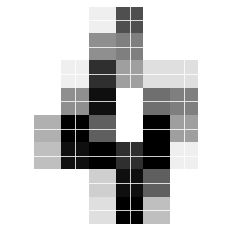

In [25]:
img_idx = 4

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(digits.images[img_idx], cmap=plt.cm.gray_r)

In [26]:
dt_clf.predict([digits.data[img_idx]])[0]

0

In [27]:
digits.target[img_idx]

4

In [28]:
for i in range(100):
    if dt_clf.predict([digits.data[i]])[0] != digits.target[i]:
        print(i)

4
5
19
31
37
53
76
92


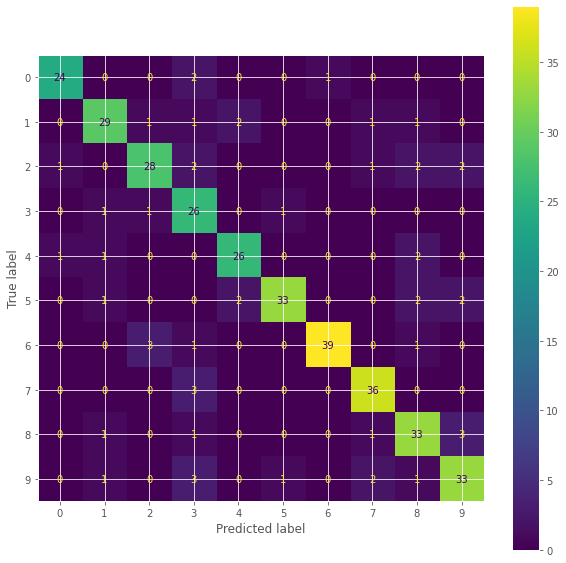

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf = dt_clf
cm = confusion_matrix(y_test, clf.predict(x_test), labels=clf.classes_)
plt.figure(figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(ax=plt.gca())

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train,y_train)

y_predicted = knn_clf.predict(x_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      0.97      0.97        35
           2       1.00      0.97      0.99        36
           3       0.91      1.00      0.95        29
           4       1.00      0.97      0.98        30
           5       0.95      0.97      0.96        40
           6       1.00      1.00      1.00        44
           7       0.95      1.00      0.97        39
           8       1.00      0.90      0.95        39
           9       0.98      0.98      0.98        41

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=4)
knn_clf.fit(x_train,y_train)

y_predicted = knn_clf.predict(x_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.95      1.00      0.97        35
           2       1.00      0.97      0.99        36
           3       0.94      1.00      0.97        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      1.00      0.99        44
           7       0.95      1.00      0.97        39
           8       1.00      0.87      0.93        39
           9       0.98      0.98      0.98        41

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



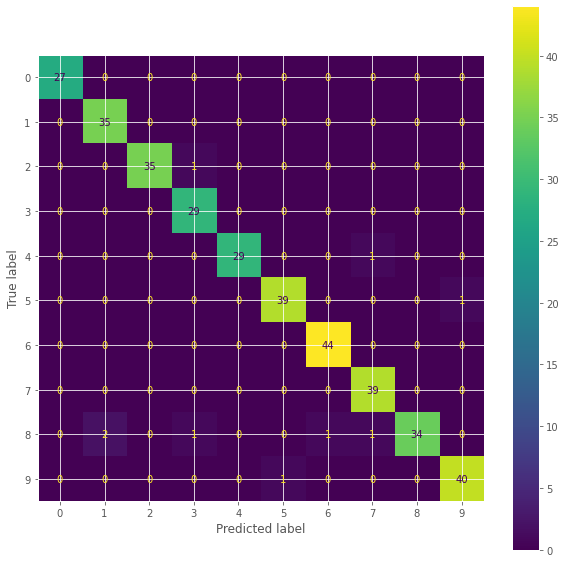

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf = knn_clf
cm = confusion_matrix(y_test, clf.predict(x_test), labels=clf.classes_)
plt.figure(figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(ax=plt.gca())

# Model Tuning

How should we set k?


In [33]:
x_actual_train, x_val, y_actual_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

[(1, 0.9861111111111112), (2, 0.9861111111111112), (3, 0.9895833333333334), (4, 0.9930555555555556), (5, 0.9895833333333334), (6, 0.9895833333333334), (7, 0.9895833333333334), (8, 0.9895833333333334), (9, 0.9895833333333334)]


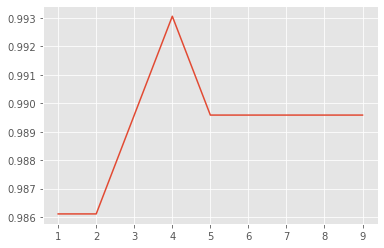

In [34]:
results = []
for k in range(1,10):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_actual_train,y_actual_train)
    y_val_predicted = clf.predict(x_val)
    acc = sum(y_val_predicted == y_val) / len(y_val)
    results.append((k, acc))

a,b = zip(*results)
plt.plot(a,b)
print(results)


# Cross Validation

(borrowed from [https://github.com/vaasha/Machine-leaning-in-examples/blob/master/sklearn/cross-validation/Cross%20Validation.ipynb])

Cross validation is an important topic in the `Machine Learning` to ensure that our model is robust enough. Traditional training strategy is using 3 parts of the dataset for training, testing a validation.

* training set - is used to train the model and optimize the hyperparameters of the model
* testing set - is used to evalutate that the model generalize enough to correctly work on data it was not trained on. However through the person doing the optimazation some knoweldge about the test set eventually leaks into the model.
* validation set - for that reason we use validation set which is used as the final check that model is able to generalize with previously unknown data.

Creating these sets limit the number of data which are used for the training and that can decrease the model's ability to learn. Cross validation allows to make a robust model by spliting the training data into `k` subsets. Each subsets uses part of it's data for training and part to test. Next subset uses different split of train and test data as you can see on the picture below. This is more intensive on the resources, but allow you to use mode data for training.

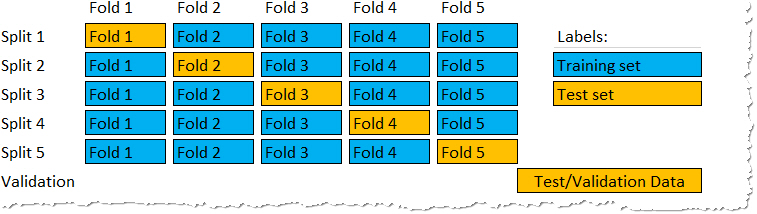![](Cross_Validation.jpg "Cross validation folds")

You can also be sure that your model is able to generalize, in case each of the fold has similar performace. If one (or more) fold is achieving really for score while others perform badly, you need to think more about the way how you split the data. You will see examples of this below. 

`Scikit Learn` is favorite python library to perform many machine learning operations and it brings many methods which helps to split the data into training, testing and validation set. The most popular which we will review in this tutorial are: 

* train_test_split - creates single split into train and test set.
* Kfold - creates k-fold splits allowing cross validation
* StratifiedKFold - creates k-fold splits considering the distribution of the target variable
* cross_val_score - evaluta model's score through cross validation

You should be aware that cross-validation is however not suitable for all the occasions and you should think wisely how you split the data.

More about cross validaiton:
* https://scikit-learn.org/stable/modules/cross_validation.html
* https://en.wikipedia.org/wiki/Cross-validation_(statistics)




In [35]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score

# cross_validate allow to specify metrics which you want to see
for i, score in enumerate(cross_validate(clf, x_train, y_train, cv=3)["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.9728601252609603
Accuracy for the fold no. 1 on the test set: 0.9832985386221295
Accuracy for the fold no. 2 on the test set: 0.9812108559498957


## Exercise

<div class="alert alert-block alert-success">
    <b>Your task:</b> Build a model of your choice to perform wine classification <a href="https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset">https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset</a>
 </div>

In [36]:
wine = datasets.load_wine()